In [1]:
# imports
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
# local
import acquire as a
import t_prepare as p

In [2]:
df = a.get_wine()
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [3]:
for col in df.columns:
    df = df.rename(columns={col: col.replace(' ','_')})
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [4]:
# Filter rows based on column: 'chlorides'
df = df[df['chlorides'] < df['chlorides'].quantile(.993)]
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [5]:
# Derive column 'bound_sulfur_dioxide' from column: 'free_sulfur_dioxide'
df.insert(6, 'bound_sulfur_dioxide', df.apply(lambda row : (row['total_sulfur_dioxide']-row['free_sulfur_dioxide']), axis=1))

In [6]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,bound_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,red
0,7.4,0.70,0.00,1.9,0.076,11.0,23.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,42.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,39.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,43.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,23.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,68.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,111.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,81.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,90.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6450 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6450 non-null   float64
 1   volatile_acidity      6450 non-null   float64
 2   citric_acid           6450 non-null   float64
 3   residual_sugar        6450 non-null   float64
 4   chlorides             6450 non-null   float64
 5   free_sulfur_dioxide   6450 non-null   float64
 6   bound_sulfur_dioxide  6450 non-null   float64
 7   total_sulfur_dioxide  6450 non-null   float64
 8   density               6450 non-null   float64
 9   pH                    6450 non-null   float64
 10  sulphates             6450 non-null   float64
 11  alcohol               6450 non-null   float64
 12  quality               6450 non-null   int64  
 13  red                   6450 non-null   int64  
dtypes: float64(12), int64(2)
memory usage: 1013.9 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,6450.0,7.208597,1.295358,3.80000,6.4000,7.000000,7.70000,15.90000
volatile_acidity,6450.0,0.338326,0.163971,0.08000,0.2300,0.290000,0.40000,1.58000
citric_acid,6450.0,0.317679,0.144463,0.00000,0.2500,0.310000,0.39000,1.66000
residual_sugar,6450.0,5.455023,4.761411,0.60000,1.8000,3.000000,8.10000,65.80000
chlorides,6450.0,0.054081,0.025257,0.00900,0.0380,0.047000,0.06400,0.21300
free_sulfur_dioxide,6450.0,30.600233,17.731148,1.00000,17.0000,29.000000,41.00000,289.00000
bound_sulfur_dioxide,6450.0,85.449767,45.308985,3.00000,56.0000,87.000000,116.00000,331.00000
total_sulfur_dioxide,6450.0,116.050000,56.382490,6.00000,78.0000,118.000000,156.00000,440.00000
density,6450.0,0.994678,0.002997,0.98711,0.9923,0.994835,0.99694,1.03898
pH,6450.0,3.219198,0.160717,2.72000,3.1100,3.210000,3.32000,4.01000


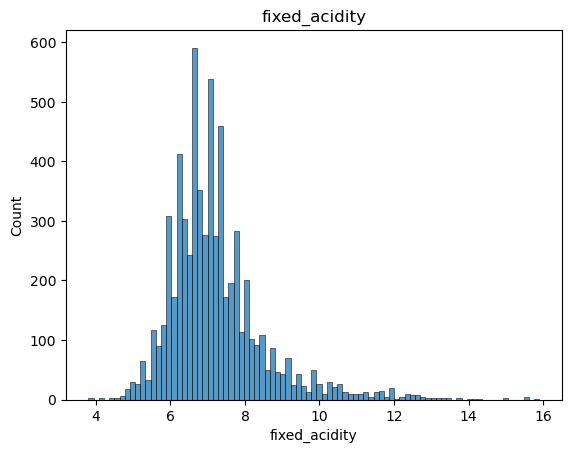

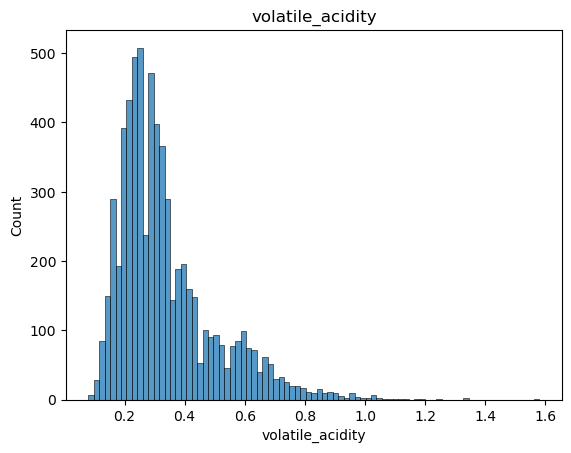

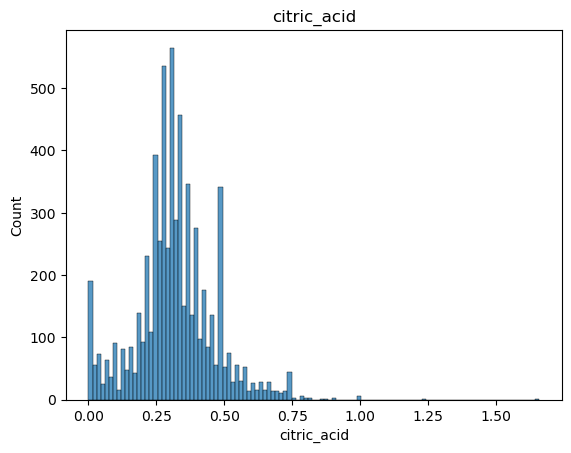

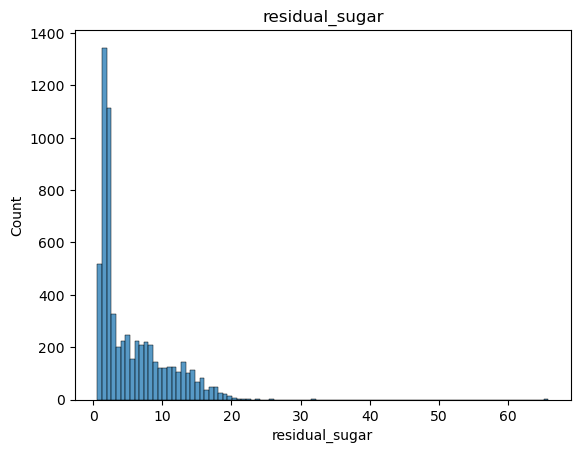

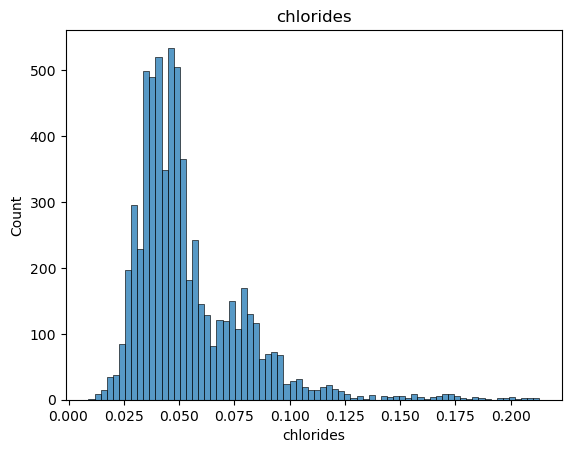

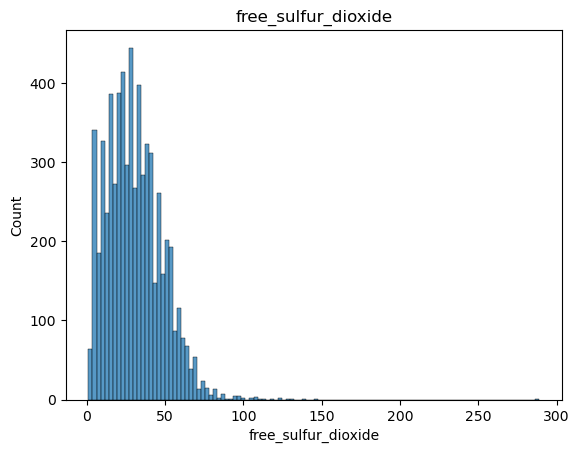

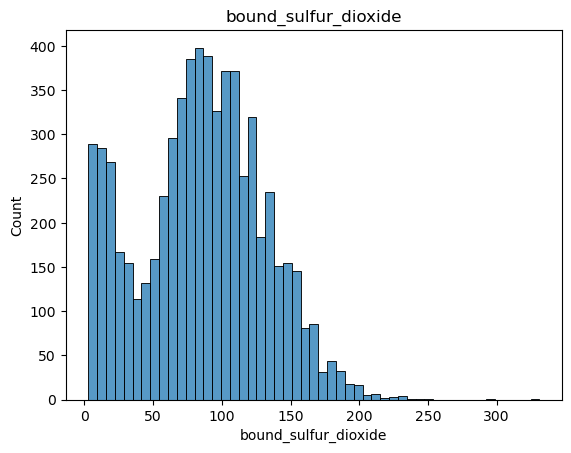

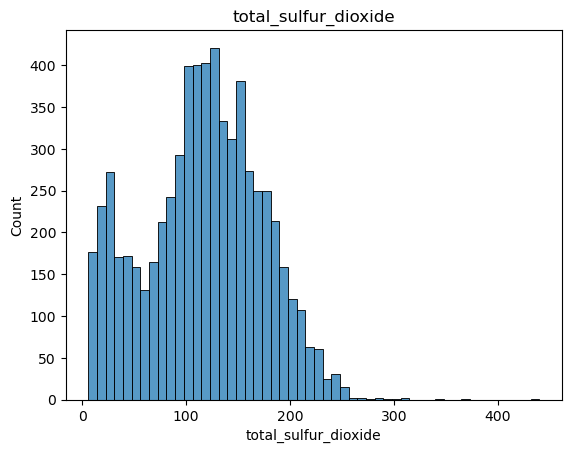

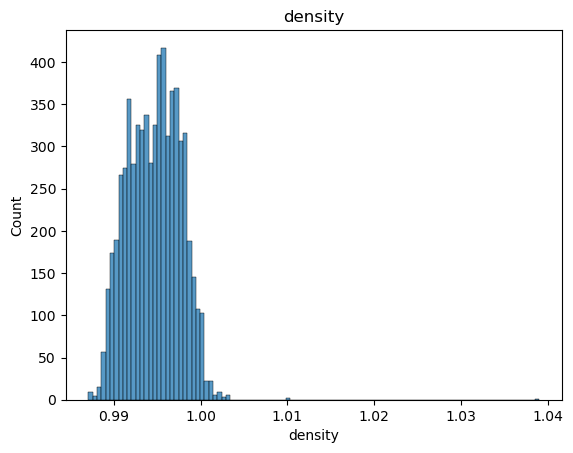

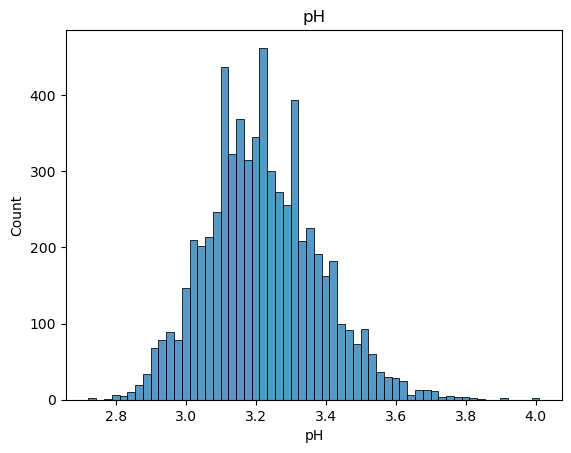

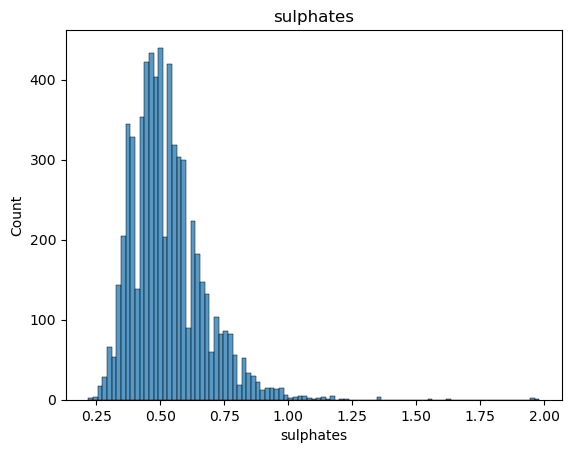

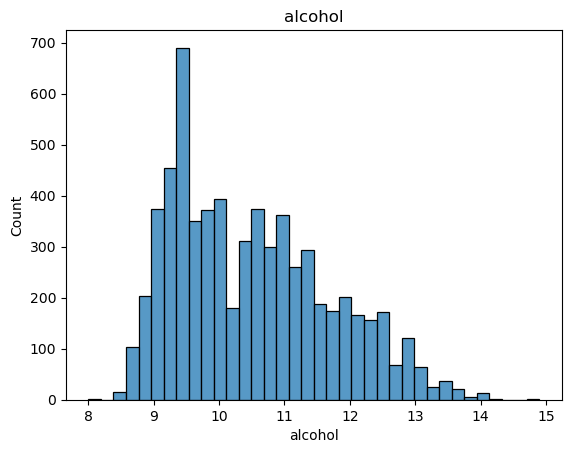

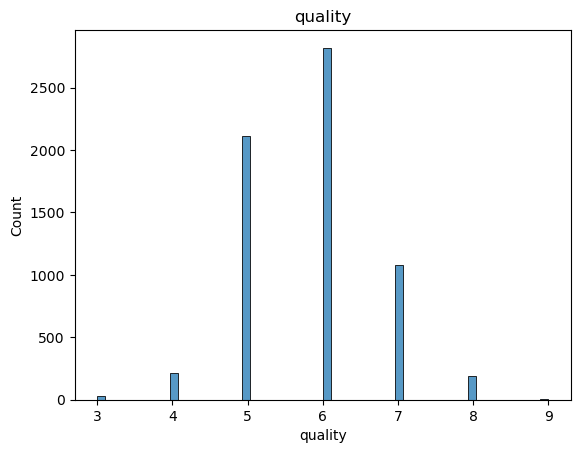

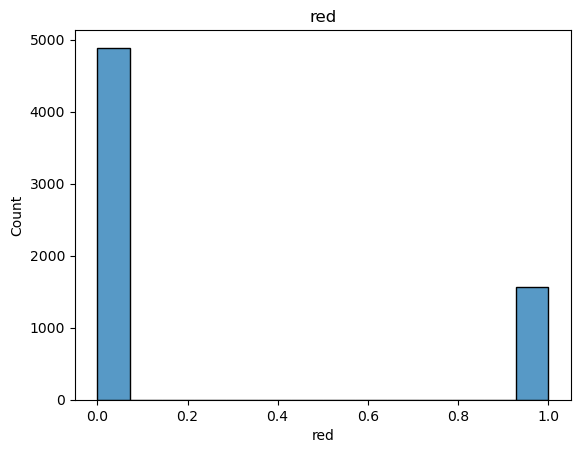

In [9]:
for col in df.columns:
    sns.histplot(data=df,x=col)
    plt.title(col)
    plt.show()